#
Perform object detection and analysis on an image from `/content/drive/MyDrive/Dataset/test` using Canny edge detection and contour analysis, display the annotated image with bounding boxes, dimensions, and center coordinates of detected objects, intermediate processed images, and provide an explanation of the computer vision approach.


First, mount Google Drive to access its files. Then, list the contents of the specified directory `/content/drive/MyDrive/Dataset/test` using `os.listdir()` to identify available image files.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

directory_path = '/content/drive/MyDrive/Dataset/test'

# Check if the directory exists
if os.path.exists(directory_path):
    # List the contents of the directory
    contents = os.listdir(directory_path)
    print(f"Contents of {directory_path}:")
    for item in contents:
        print(item)
else:
    print(f"Directory '{directory_path}' does not exist. Please ensure the path is correct and Google Drive is mounted.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contents of /content/drive/MyDrive/Dataset/test:
IMG_1661_JPG.rf.43c023509512a532e76f21c0ea1d3f19.txt
IMG_1682_JPG.rf.13680c043fe5ca84f758db85c0b202c1.txt
IMG_1682_JPG.rf.13680c043fe5ca84f758db85c0b202c1.jpg
IMG_1665_JPG.rf.706ab7f5ca2f9824475ede390534d002.txt
converted-IMG_1522_jpg.rf.d196fda06d729c1bce9f685ed5b25f85.txt
converted-IMG_1510_jpg.rf.61d89789ee4856ec4a864d68c2c063ff.txt
IMG_1678_JPG.rf.8a2f2147372bafa3185c2c8a886a2849.jpg
IMG_1661_JPG.rf.43c023509512a532e76f21c0ea1d3f19.jpg
converted-IMG_1510_jpg.rf.61d89789ee4856ec4a864d68c2c063ff.jpg
IMG_1816_JPG.rf.3d165100db4a555baff13632fe85699f.jpg
IMG_1809_JPG.rf.b453585c710773b072f29b551bb02ed6.jpg
IMG_1807_JPG.rf.498e1417db0409e8997d1298bf8175bb.txt
IMG_1665_JPG.rf.706ab7f5ca2f9824475ede390534d002.jpg
IMG_1816_JPG.rf.3d165100db4a555baff13632fe85699f.txt
converted-IMG_1567_jpg.rf.396715b456f844547e19757a


The previous output showed a list of all files in the directory. To identify only the image files, I will filter the `contents` list to include only those with common image extensions. Then, I will select an appropriate image file from the filtered list to proceed with the task and store its full path in a variable.



In [ ]:
image_files = [f for f in contents if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

if image_files:
    # Choose one image file to work with (e.g., the first one)
    selected_image_filename = image_files[0]
    image_path = os.path.join(directory_path, selected_image_filename)
    print(f"Selected image file: {selected_image_filename}")
    print(f"Full path to selected image: {image_path}")
else:
    image_path = None
    print("No image files found in the directory.")

Selected image file: IMG_1682_JPG.rf.13680c043fe5ca84f758db85c0b202c1.jpg
Full path to selected image: /content/drive/MyDrive/Dataset/test/IMG_1682_JPG.rf.13680c043fe5ca84f758db85c0b202c1.jpg


## Load Image from Google Drive

Select an image file from the listed contents of `/content/drive/MyDrive/Dataset/test` and load it using OpenCV. This step will use a concrete path to an existing image file on Google Drive.


Image 'IMG_1682_JPG.rf.13680c043fe5ca84f758db85c0b202c1.jpg' loaded successfully.


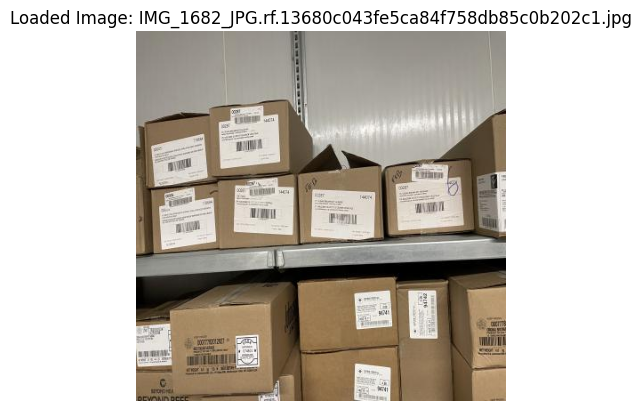

In [ ]:
import cv2
import matplotlib.pyplot as plt # Import matplotlib for displaying images

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    print(f"Image '{selected_image_filename}' loaded successfully.")
    # Display the image using matplotlib to verify
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Loaded Image: {selected_image_filename}")
    plt.axis('off')
    plt.show()
else:
    print(f"Error: Could not load image from '{image_path}'. Please check the path and file integrity.")


## Preprocess Image


Convert the loaded image to grayscale and apply a Gaussian blur to reduce noise and prepare it for edge detection.


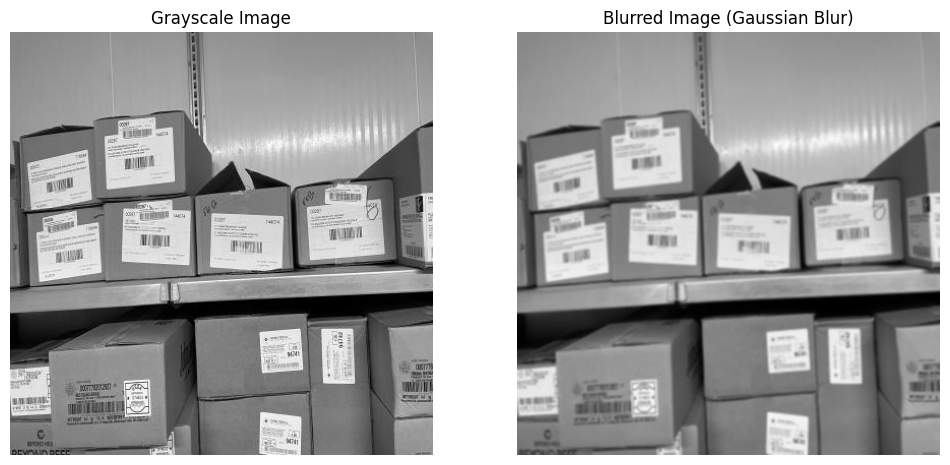

Image successfully converted to grayscale and blurred.


In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. Convert the loaded color image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Apply a Gaussian blur to reduce noise
# Kernel size (5, 5) and standard deviation 0 (calculated from kernel size)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 3. Display both the gray_image and blurred_image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image (Gaussian Blur)')
plt.axis('off')

plt.show()

print("Image successfully converted to grayscale and blurred.")

## Perform Canny Edge Detection

Apply the Canny edge detection algorithm to the preprocessed image to identify significant edges.


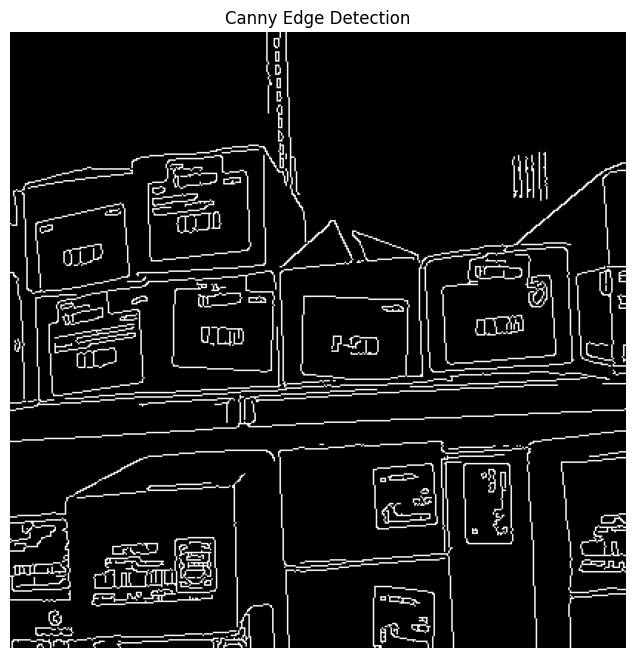

Canny edge detection applied successfully.


In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. Apply Canny edge detection
# Threshold values can be adjusted based on image characteristics
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# 2. Display the detected edges
plt.figure(figsize=(8, 8))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

print("Canny edge detection applied successfully.")

## Find Contours

Finding contours in the Canny edge detected image to identify potential objects.

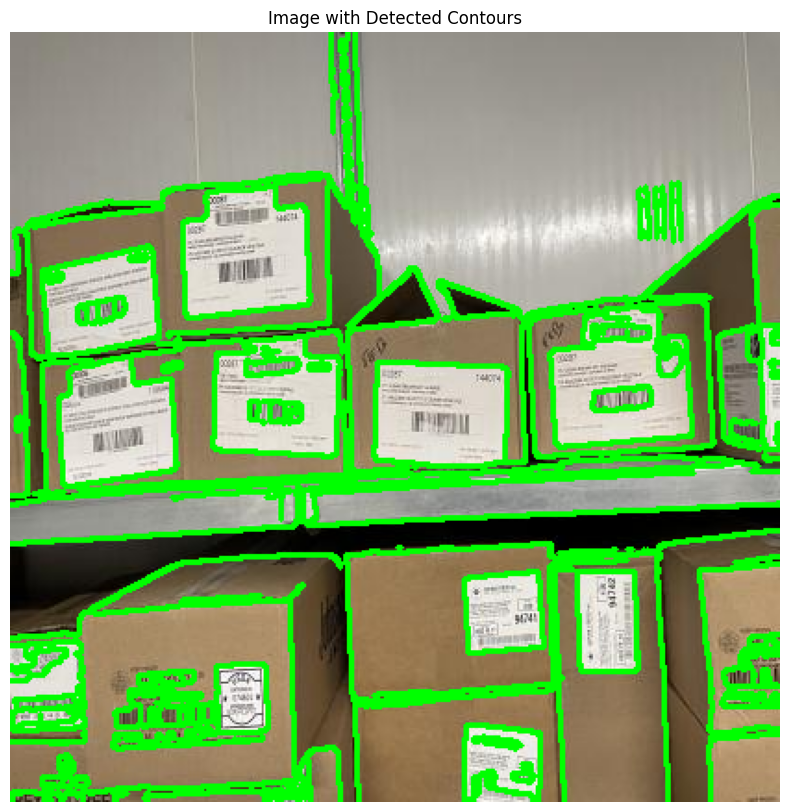

Found 107 contours.


In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. Find contours in the edged image
# cv2.RETR_EXTERNAL retrieves only external contours
# cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 2. Create a copy of the original color image to draw contours on
# It's important to use the original color image to visualize contours properly
image_with_contours = image.copy()

# 3. Draw the detected contours on the copied image
# -1 means to draw all contours
# (0, 255, 0) is green color in BGR
# 2 is the thickness of the contour lines
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# 4. Display the image with drawn contours
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Image with Detected Contours')
plt.axis('off')
plt.show()

print(f"Found {len(contours)} contours.")

## Analyze Contours


Analyze the detected contours to filter out noise, approximate polygons, and extract bounding boxes, dimensions, and center coordinates for each significant object.

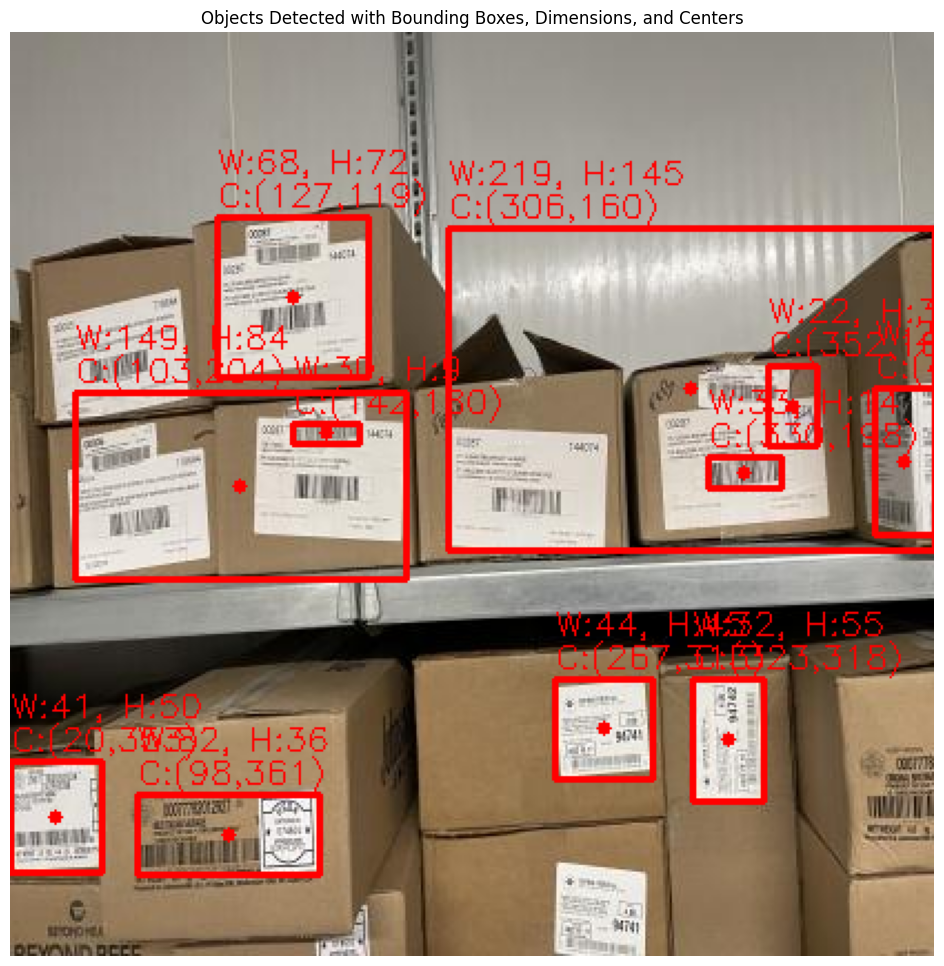

Detected and analyzed 11 significant objects.
Example object info (first 3 if available):
  Object 1: BBox=(57, 343, 82, 36), Dimensions=(82, 36), Center=(98, 361), Area=1160.50
  Object 2: BBox=(0, 328, 41, 50), Dimensions=(41, 50), Center=(20, 353), Area=224.50
  Object 3: BBox=(307, 291, 32, 55), Dimensions=(32, 55), Center=(323, 318), Area=1685.00


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the original image to draw final annotations on
annotated_image = image.copy()

# List to store information about detected objects
objects_info = []

# Define min and max area to filter contours (these values might need adjustment)
min_contour_area = 100
max_contour_area = 50000

for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)

    # Filter out small or very large contours
    if min_contour_area < area < max_contour_area:
        # Approximate the contour to a polygon
        # The epsilon parameter determines the maximum distance between the original curve and its approximation.
        # It's usually a small fraction of the perimeter.
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Get the bounding rectangle for the approximated contour
        x, y, w, h = cv2.boundingRect(approx)

        # Calculate center coordinates
        cx = x + w // 2
        cy = y + h // 2

        # Store object information
        objects_info.append({
            'bbox': (x, y, w, h),
            'dimensions': (w, h),
            'center': (cx, cy),
            'area': area
        })

        # Draw the bounding box (red color)
        cv2.rectangle(annotated_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

        # Put text for dimensions
        dimensions_text = f"W:{w}, H:{h}"
        cv2.putText(annotated_image, dimensions_text, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

        # Put text for center coordinates
        center_text = f"C:({cx},{cy})"
        cv2.putText(annotated_image, center_text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

        # Draw a small circle at the center
        cv2.circle(annotated_image, (cx, cy), 3, (0, 0, 255), -1)

# Display the annotated image
plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title('Objects Detected with Bounding Boxes, Dimensions, and Centers')
plt.axis('off')
plt.show()

print(f"Detected and analyzed {len(objects_info)} significant objects.")
print("Example object info (first 3 if available):")
for i, obj in enumerate(objects_info[:3]):
    print(f"  Object {i+1}: BBox={obj['bbox']}, Dimensions={obj['dimensions']}, Center={obj['center']}, Area={obj['area']:.2f}")

## Display Results

Display both the original image with annotations and the intermediate processed images (grayscale, blurred, edges) to illustrate the computer vision pipeline.


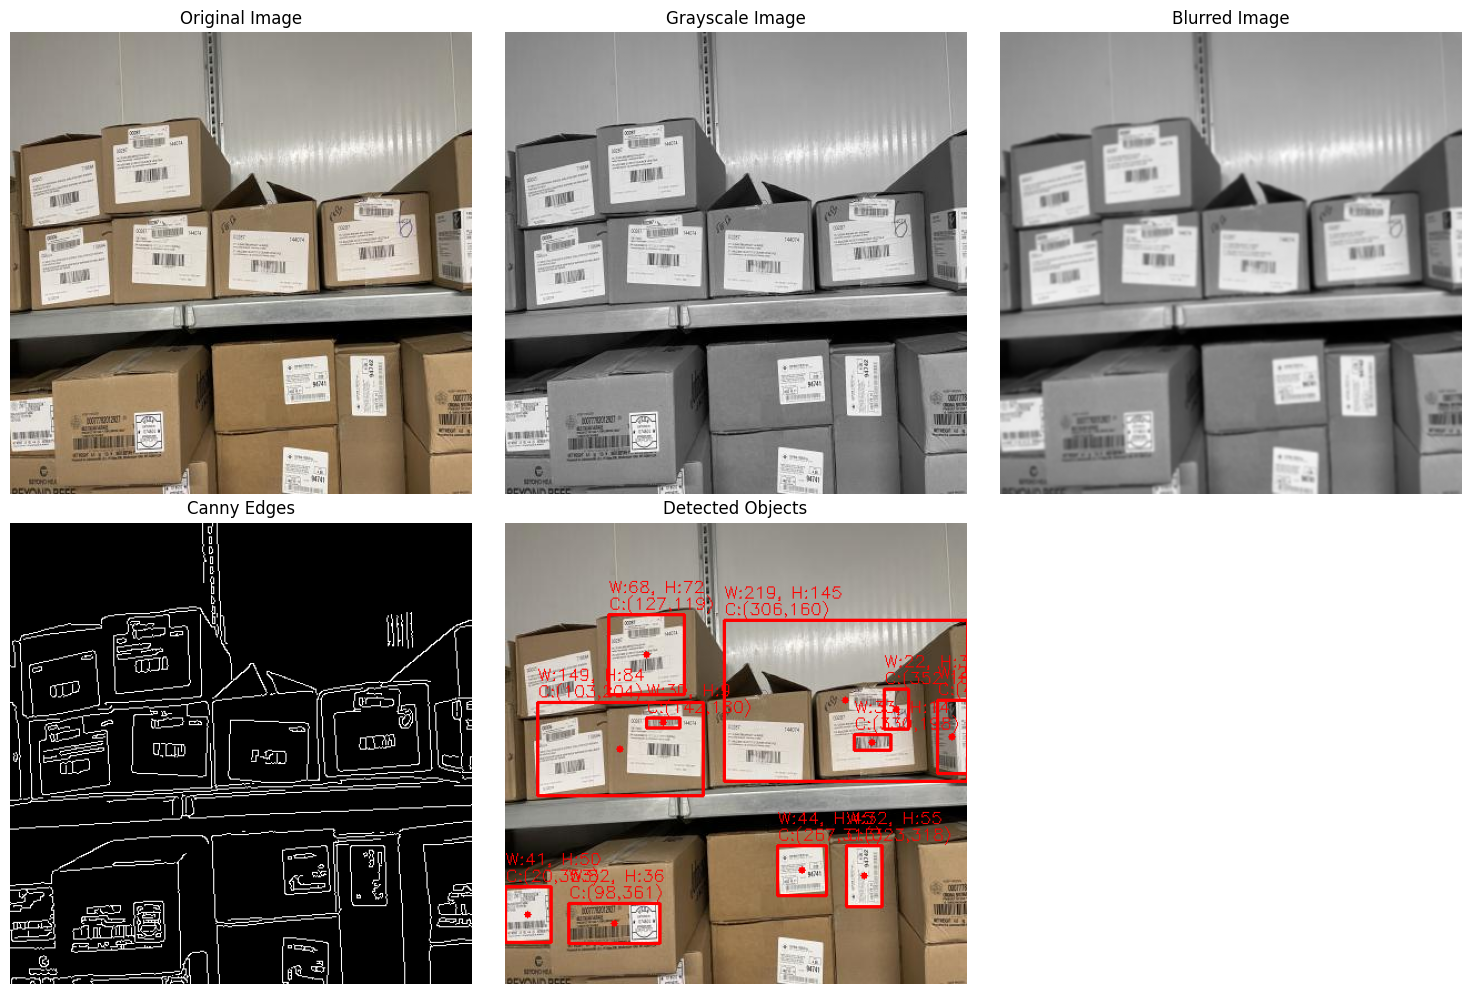

All intermediate and final images displayed successfully.


In [ ]:
import matplotlib.pyplot as plt
import cv2

# Create a figure with multiple subplots
plt.figure(figsize=(15, 10)) # Adjust figure size as needed

# Subplot 1: Original Image
plt.subplot(2, 3, 1) # 2 rows, 3 columns, 1st subplot
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Subplot 2: Grayscale Image
plt.subplot(2, 3, 2) # 2 rows, 3 columns, 2nd subplot
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Subplot 3: Blurred Image
plt.subplot(2, 3, 3) # 2 rows, 3 columns, 3rd subplot
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

# Subplot 4: Canny Edges
plt.subplot(2, 3, 4) # 2 rows, 3 columns, 4th subplot
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

# Subplot 5: Final Annotated Image
plt.subplot(2, 3, 5) # 2 rows, 3 columns, 5th subplot
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Objects')
plt.axis('off')

# Adjust layout to prevent overlapping titles/images
plt.tight_layout()
plt.show()

print("All intermediate and final images displayed successfully.")

## Write Explanation



## Explanation of Computer Vision Approach

This computer vision pipeline was designed to perform object detection and analysis using a combination of edge detection and contour analysis techniques. The process began with **image preprocessing** to prepare the raw image for robust feature extraction. First, the color image was converted to **grayscale** to simplify subsequent processing by reducing the dimensionality of the pixel data, focusing on intensity rather than color channels. Following this, a **Gaussian blur** was applied. This step is crucial for noise reduction, smoothing out fine details and minor imperfections in the image, which helps prevent spurious edges during the next stage.

Next, **Canny edge detection** was employed on the blurred grayscale image. Canny is a multi-stage algorithm renowned for its ability to detect a wide range of edges in images while suppressing noise and minimizing false positives. It works by finding the intensity gradients of the image, then applying non-maximum suppression to thin the edges, and finally using hysteresis thresholding to track significant edges, thus providing a precise map of object boundaries.

The detected edges served as input for **contour finding**. Using `cv2.findContours()`, we identified continuous curves along points with the same color or intensity. We specified `cv2.RETR_EXTERNAL` to retrieve only the outermost contours, effectively focusing on the main objects and ignoring internal holes. `cv2.CHAIN_APPROX_SIMPLE` was used to compress redundant points, making the contour representations more efficient. These contours represent the shapes of potential objects.

Finally, **contour analysis** was performed. Each detected contour was iterated through. A key step here was **area filtering** (`cv2.contourArea()`) to discard very small contours (likely noise) and extremely large ones (often the image border or irrelevant background). Significant contours were then **approximated into polygons** using `cv2.approxPolyDP()`, simplifying complex shapes while retaining their essential geometric features. From these approximated contours, **bounding boxes** (`cv2.boundingRect()`) were extracted, providing the `(x, y, w, h)` coordinates. The center coordinates (`cx, cy`) were then calculated from these bounding boxes. This information—bounding box, dimensions, and center—was then annotated back onto a copy of the original image, visually marking and quantifying each detected object. This systematic approach effectively identifies, isolates, and measures objects within the image based on their structural characteristics.